<a href="https://colab.research.google.com/github/prtxz/accident_severity_prediction/blob/main/accident_severity_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
%matplotlib inline
from pylab import rcParams

## General Tools
import joblib
import warnings


# sklearn library
import sklearn

### sklearn preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder


# Error Metrics
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


### Machine learning classification Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier #stochastic gradient descent clasifeier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier


#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


#hyper parameter tunning
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV

In [ ]:
### Initial settings
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 10
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000'
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RTA Dataset.csv to RTA Dataset.csv


In [ ]:
dataset = pd.read_csv('RTA Dataset.csv')

In [ ]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
dataset.shape

(12316, 32)

In [ ]:
dataset.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
dataset['Time'] = pd.to_datetime(dataset['Time'])

In [ ]:
dataset.describe(include=['O']).T


,count,unique,top,freq
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883
Defect_of_vehicle,7889,3,No defect,7777


In [ ]:
null_dataset = dataset.isnull().sum().sort_values(ascending=False).to_frame()
null_dataset.columns= ["No of Null values"]
null_dataset["% of Null values"] = round(null_dataset["No of Null values"]/len(dataset)*100,2)
null_dataset[null_dataset["No of Null values"] > 0]

,No of Null values,% of Null values
Defect_of_vehicle,4427,35.95
Service_year_of_vehicle,3928,31.89
Work_of_casuality,3198,25.97
Fitness_of_casuality,2635,21.39
Type_of_vehicle,950,7.71
Types_of_Junction,887,7.20
Driving_experience,829,6.73
Educational_level,741,6.02
Vehicle_driver_relation,579,4.70
Owner_of_vehicle,482,3.91


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
print("Unique values per column:")
dataset.nunique()

Unique values per column:


Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [ ]:
# extracting hour and minute from timestamp
dataset['hour'] = dataset['Time'].dt.hour
dataset['minute'] = dataset['Time'].dt.minute
dataset= dataset.drop('Time', axis=1)

In [ ]:
dataset.head()

In [ ]:
dataset["Accident_severity"].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

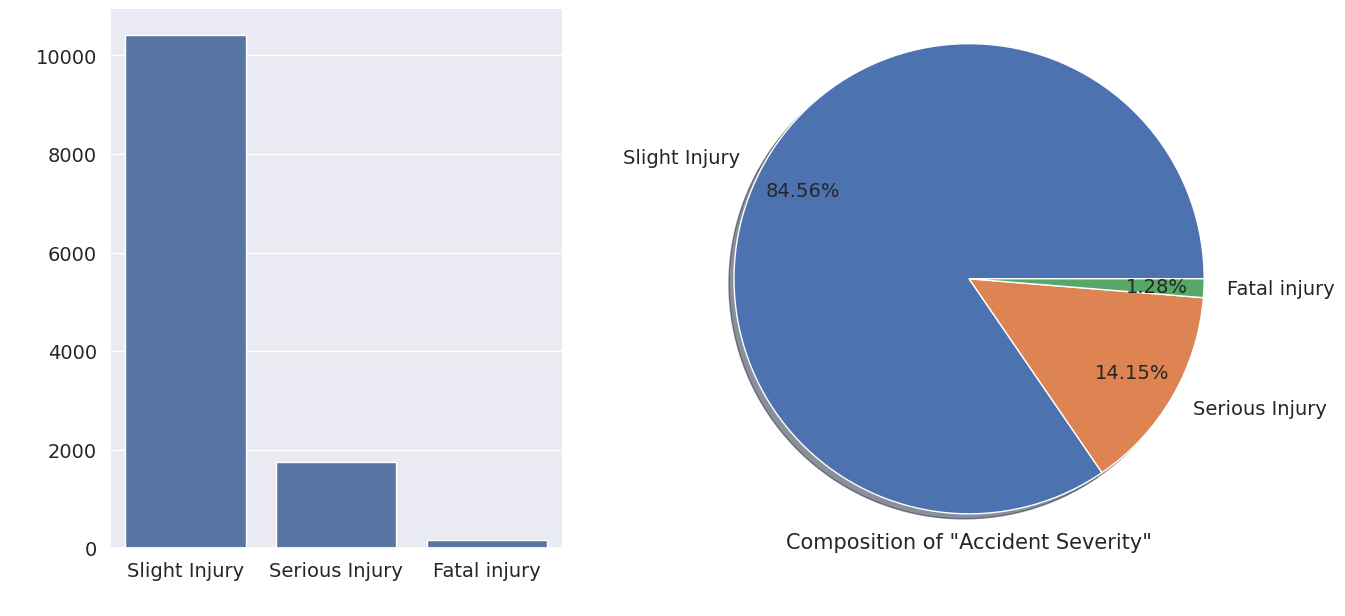

In [ ]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=dataset["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(dataset["Accident_severity"].value_counts(),
        labels=list(dataset["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

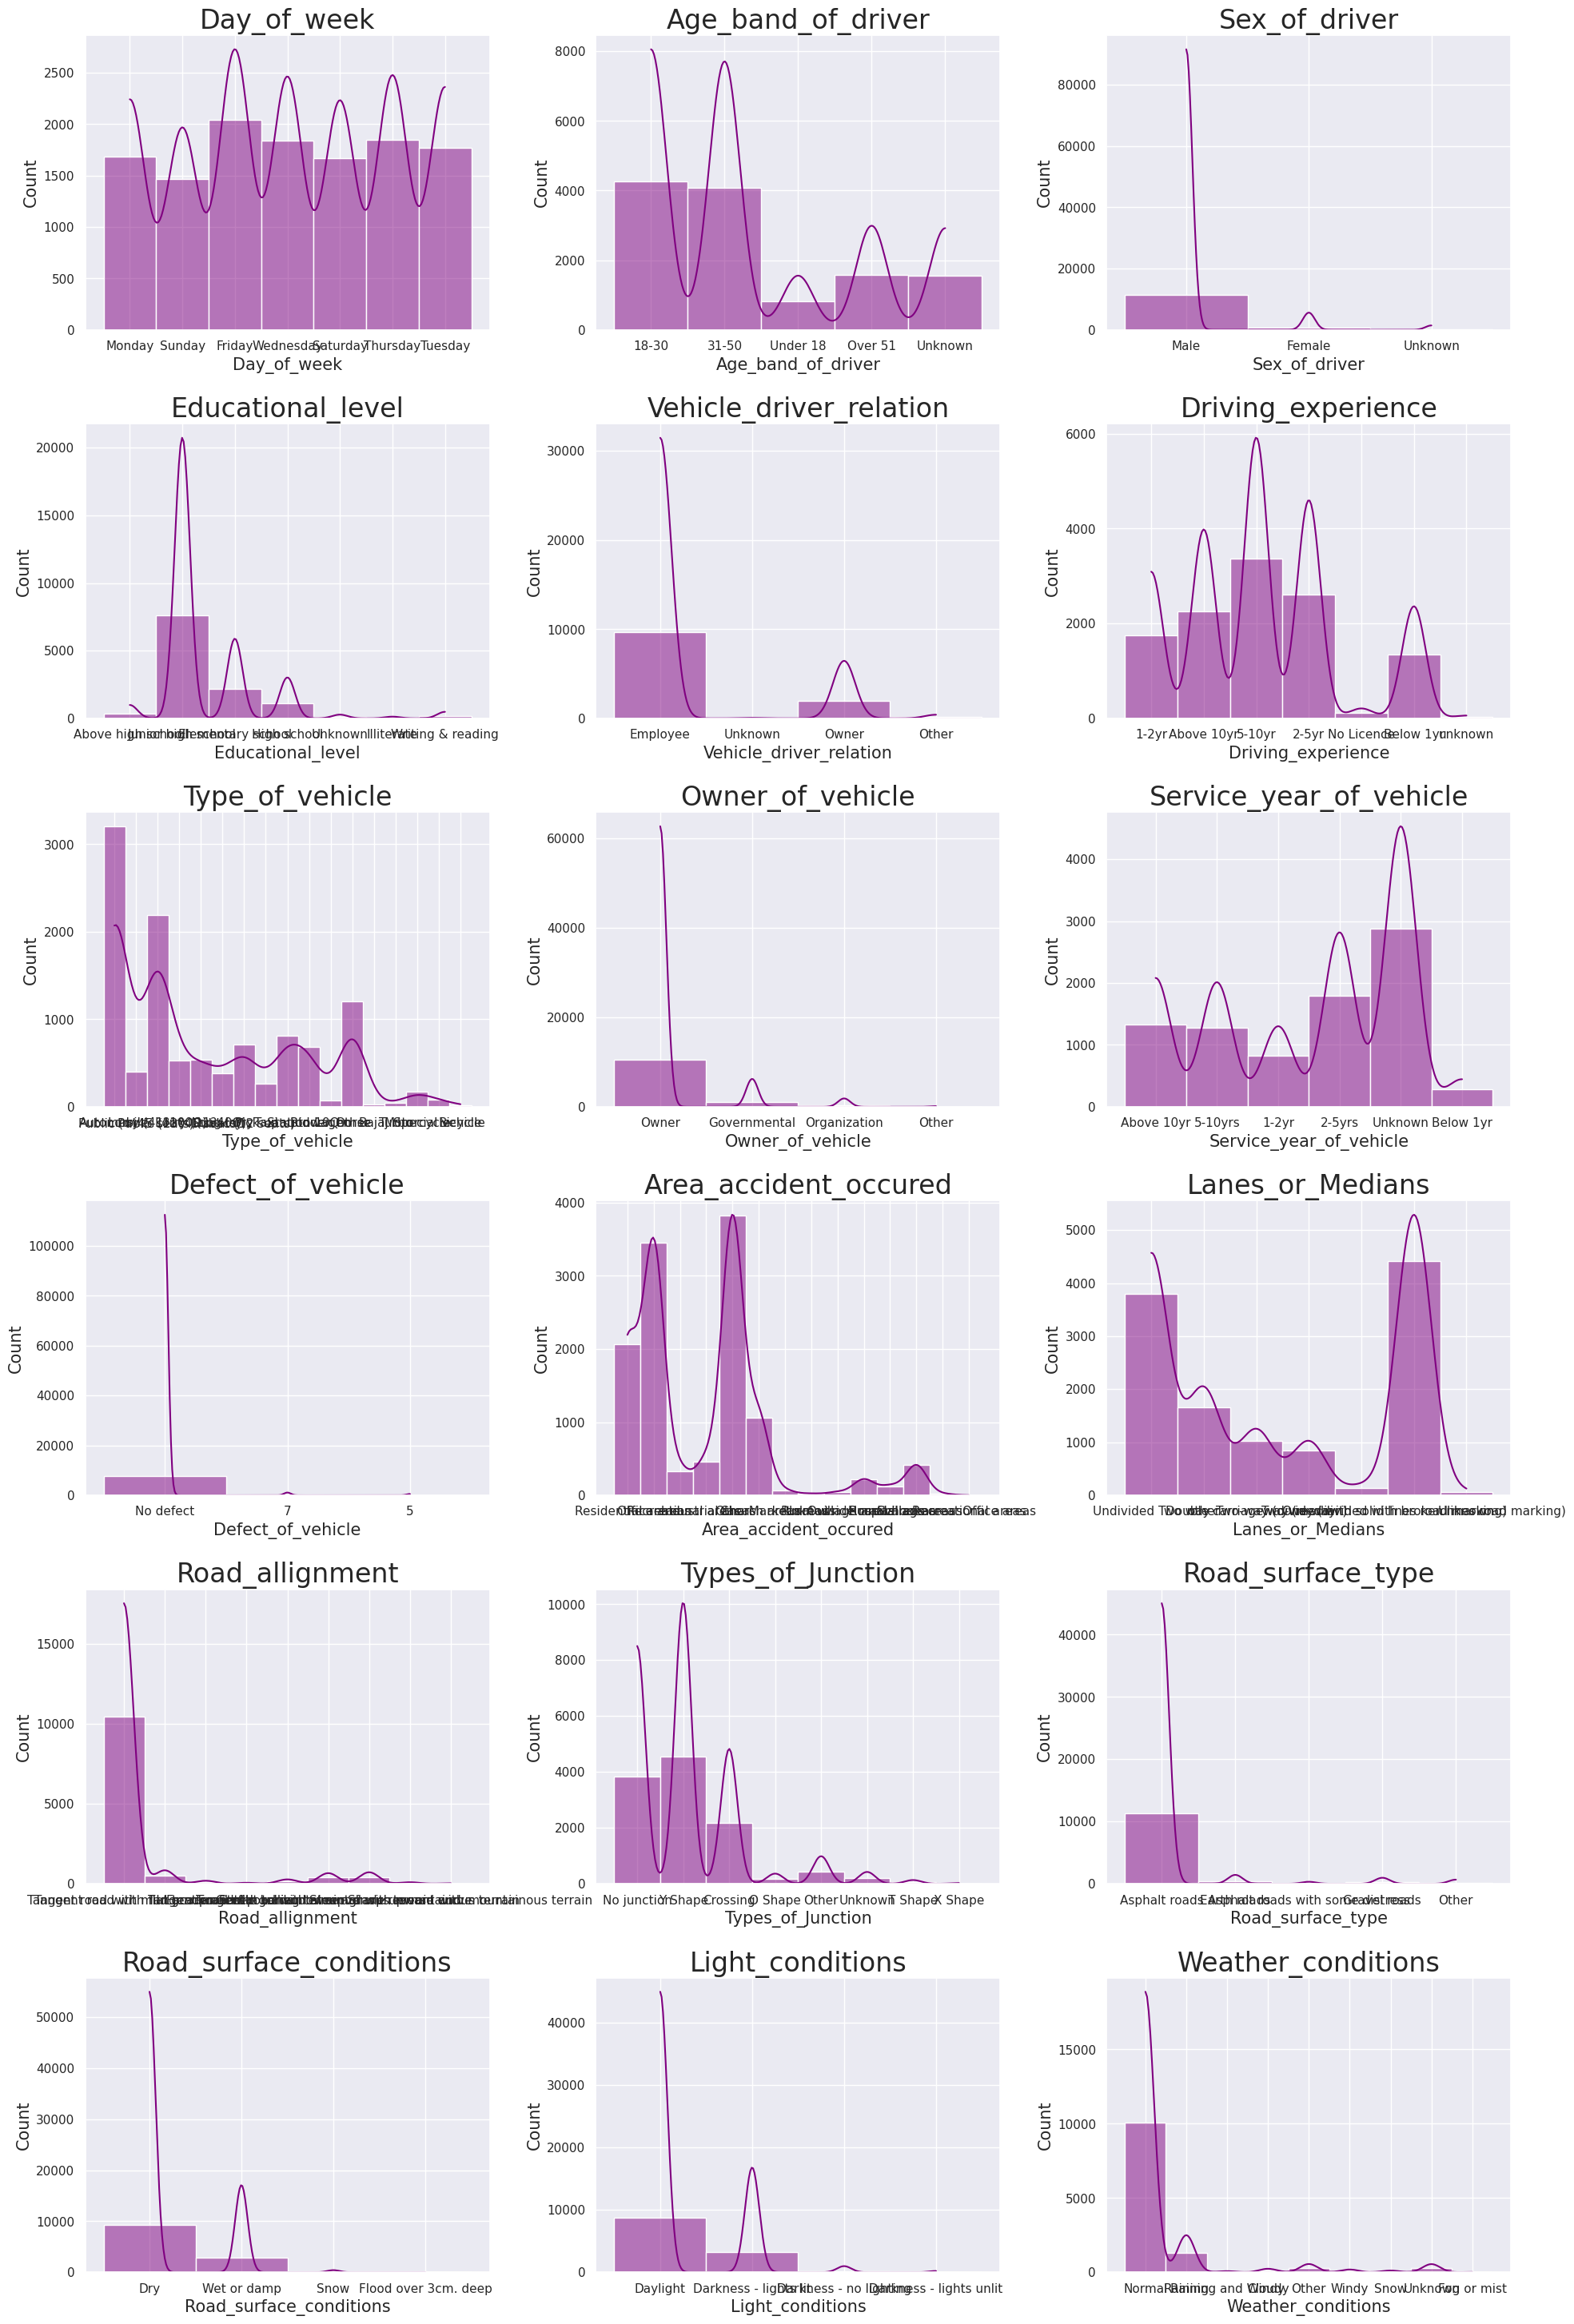

In [ ]:
sns.set(rc={
            "font.size":15,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f,ax in zip(dataset,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=dataset,x=dataset[f],kde=True,color='purple')
    ax.set_title(f)

In [ ]:
dataset.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour', 'minute'],
      dtype='object')

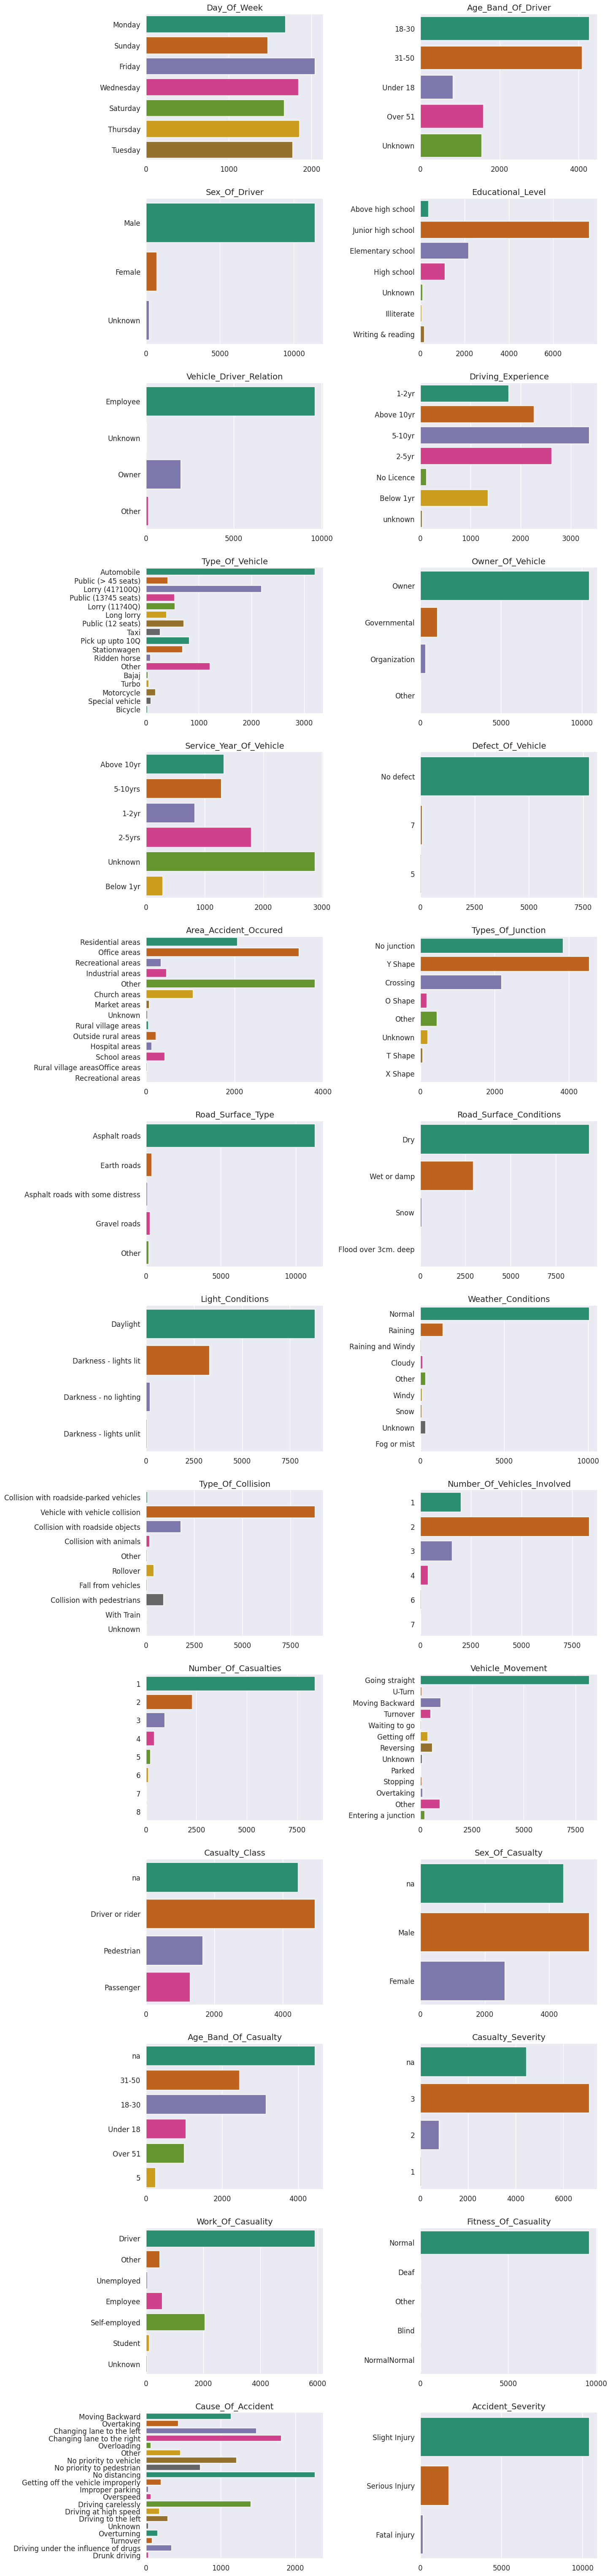

In [ ]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in dataset.drop(['hour', 'minute', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement'], axis=1):
    if plotnumber <= dataset.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=dataset, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

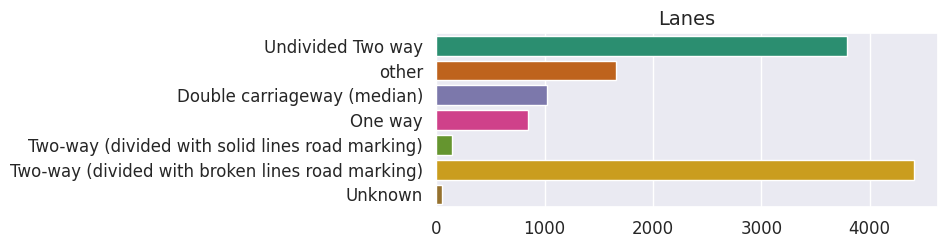

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=dataset, y='Lanes_or_Medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

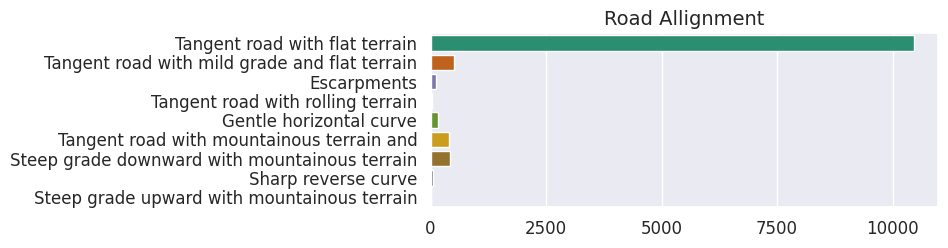

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=dataset, y='Road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

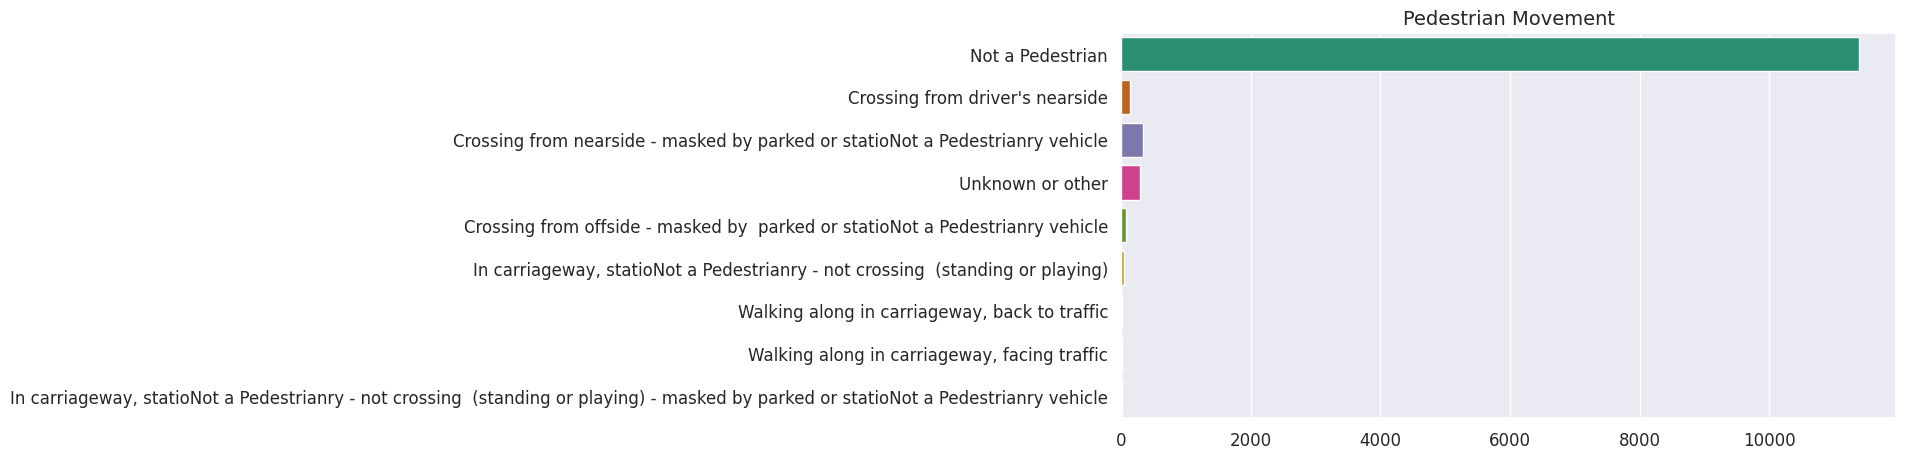

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

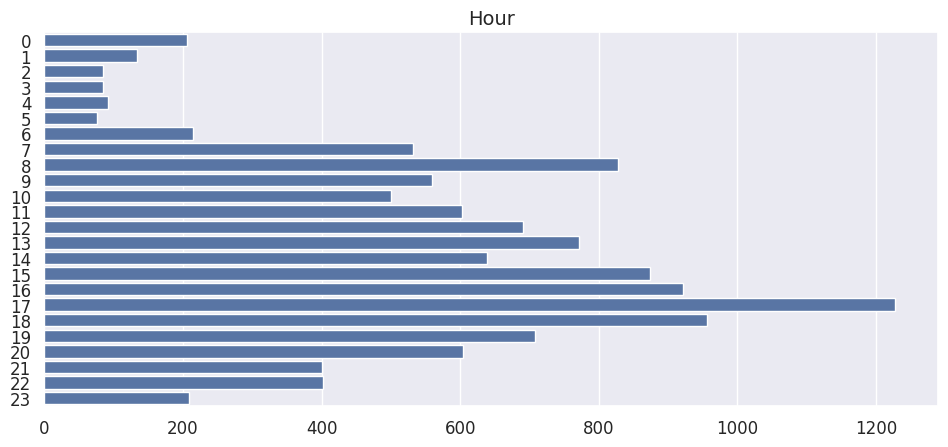

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

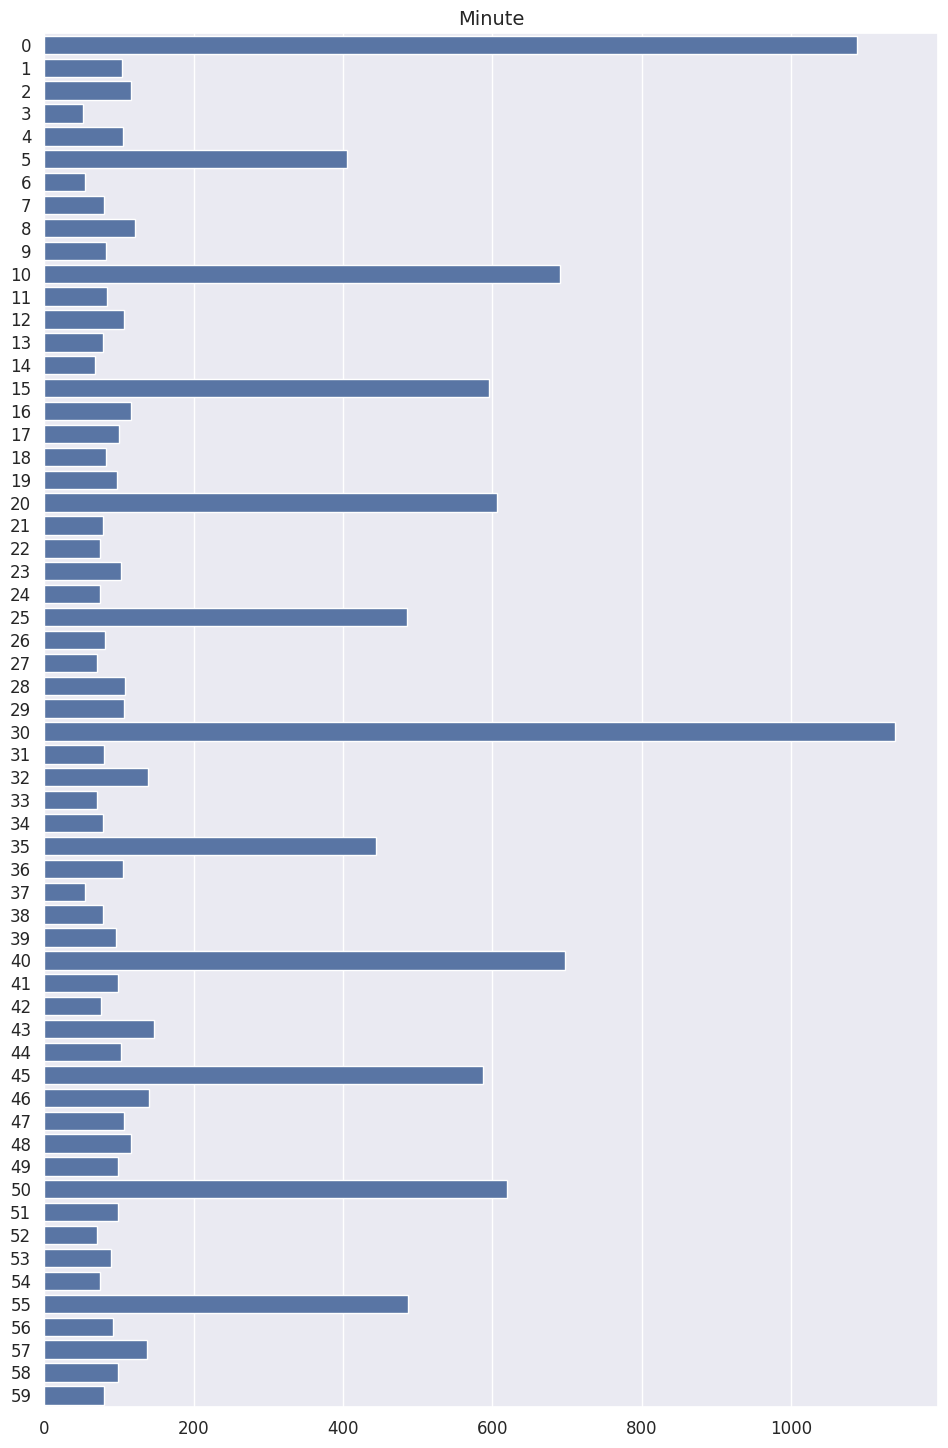

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(data=dataset, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()
categorical_cols = dataset.select_dtypes('object').columns.tolist()

In [ ]:
print("Total numeric columns are:", len(numeric_cols))
print(numeric_cols)

Total numeric columns are: 4
['Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute']


In [ ]:
# categorical features
print("Total categorical columns are:", len(categorical_cols))
print(categorical_cols)

Total categorical columns are: 29
['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [ ]:
categorical_cols.remove("Accident_severity")

In [ ]:
dataset.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6


In [ ]:
target_col = "Accident_severity"  # dependent feature
input_cols = ['Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute', 'Day_of_week',
              'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation',
              'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
              'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
              'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
              'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
              'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality',
              'Pedestrian_movement', 'Cause_of_accident']  # independent features

In [ ]:
val_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)
train_dataset, val_dataset = train_test_split(val_dataset, test_size=0.25, random_state=42)

In [ ]:
print(dataset.shape)
print(val_dataset.shape)
print(test_dataset.shape)
print(train_dataset.shape)

(12316, 33)
(2463, 33)
(2464, 33)
(7389, 33)


In [ ]:
# copy of training dataset
train_inputs = train_dataset[input_cols].copy()
train_targets = train_dataset[target_col].copy()

# copy of valdation dataset

val_inputs = val_dataset[input_cols].copy()
val_targets = val_dataset[target_col].copy()

# copy of test dataset

test_inputs = test_dataset[input_cols].copy()
test_targets = test_dataset[target_col].copy()

In [ ]:
train_inputs.head()

,Number_of_vehicles_involved,Number_of_casualties,hour,minute,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,...,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
2345,2,1,20,41,Monday,31-50,Male,Elementary school,Employee,2-5yr,...,Collision with roadside objects,Going straight,Driver or rider,Female,Over 51,3,Self-employed,Normal,Not a Pedestrian,Getting off the vehicle improperly
9300,3,2,13,0,Friday,Over 51,Male,Elementary school,Employee,5-10yr,...,Vehicle with vehicle collision,Entering a junction,Pedestrian,Male,18-30,3,NaN,NaN,Unknown or other,Moving Backward
11790,2,1,9,25,Friday,31-50,Male,Junior high school,Employee,Below 1yr,...,Vehicle with vehicle collision,Reversing,Passenger,Female,31-50,3,NaN,NaN,Not a Pedestrian,Driving carelessly
1156,1,2,22,35,Thursday,18-30,Male,Junior high school,Owner,Below 1yr,...,Collision with pedestrians,Going straight,Pedestrian,Male,Under 18,2,Student,Normal,Not a Pedestrian,Changing lane to the left
353,2,1,6,0,Sunday,Unknown,Female,Junior high school,Employee,1-2yr,...,Collision with roadside objects,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Driving carelessly


In [ ]:
imputer = SimpleImputer(strategy = 'median').fit(train_dataset[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
imputer = SimpleImputer(strategy = 'most_frequent').fit(dataset[categorical_cols])
train_inputs[categorical_cols] = imputer.transform(train_inputs[categorical_cols])
val_inputs[categorical_cols] = imputer.transform(val_inputs[categorical_cols])
test_inputs[categorical_cols] = imputer.transform(test_inputs[categorical_cols])

In [ ]:
train_inputs.isna().sum()

Number_of_vehicles_involved    0
Number_of_casualties           0
hour                           0
minute                         0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian

In [ ]:
list(imputer.statistics_)

['Friday',
 '18-30',
 'Male',
 'Junior high school',
 'Employee',
 '5-10yr',
 'Automobile',
 'Owner',
 'Unknown',
 'No defect',
 'Other',
 'Two-way (divided with broken lines road marking)',
 'Tangent road with flat terrain',
 'Y Shape',
 'Asphalt roads',
 'Dry',
 'Daylight',
 'Normal',
 'Vehicle with vehicle collision',
 'Going straight',
 'Driver or rider',
 'Male',
 'na',
 '3',
 'Driver',
 'Normal',
 'Not a Pedestrian',
 'No distancing']

In [ ]:
scaler = MinMaxScaler().fit(train_dataset[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[7.0, 8.0, 23.0, 59.0]

In [ ]:
train_inputs[numeric_cols].describe()

,Number_of_vehicles_involved,Number_of_casualties,hour,minute
count,7389.000000,7389.000000,7389.000000,7389.000000
mean,0.173298,0.077567,0.601999,0.467709
std,0.114029,0.140985,0.224895,0.296326
min,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.000000,0.434783,0.203390
50%,0.166667,0.000000,0.652174,0.508475
75%,0.166667,0.142857,0.782609,0.728814
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
def ordinal_encoder(dataset, feats):
    for feat in feats:
        feat_val = list(np.arange(dataset[feat].nunique()))
        feat_key = list(dataset[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        dataset[feat] = dataset[feat].map(feat_dict)
    return dataset

In [ ]:
train_inputs = ordinal_encoder(train_inputs,train_inputs[categorical_cols].columns)
val_inputs = ordinal_encoder(val_inputs,val_inputs[categorical_cols].columns)
test_inputs = ordinal_encoder(test_inputs,test_inputs[categorical_cols].columns)

In [ ]:
train_inputs.columns

Index(['Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute',
       'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident'],
      dtype='object')

In [ ]:
# check the shape of the data before saving data in parquet.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (7389, 32)
train_targets: (7389,)
val_inputs: (2463, 32)
val_targets: (2463,)
test_inputs: (2464, 32)
test_targets: (2464,)


In [ ]:
!pip install pyarrow --quiet

In [ ]:
# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')


# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

In [ ]:
# check the shape of the data after saving data in parquet.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (7389, 32)
train_targets: (7389,)
val_inputs: (2463, 32)
val_targets: (2463,)
test_inputs: (2464, 32)
test_targets: (2464,)


In [ ]:
train_dataset['Accident_severity'] = train_dataset['Accident_severity'].map({'Slight Injury':0 , 'Serious Injury':1,'Fatal injury':2})
val_dataset['Accident_severity'] = val_dataset['Accident_severity'].map({'Slight Injury':0 , 'Serious Injury':1,'Fatal injury':2})
test_dataset['Accident_severity'] = test_dataset['Accident_severity'].map({'Slight Injury':0 , 'Serious Injury':1, 'Fatal injury':2})

In [ ]:
# training dataset
X_train = train_inputs[['Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute','Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute',
       'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident']]
y_train = train_dataset["Accident_severity"]

# validation dataset
X_val = val_inputs[['Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute','Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute',
       'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident']]
y_val=  val_dataset["Accident_severity"]

# test dataset
X_test = test_inputs[['Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute','Number_of_vehicles_involved', 'Number_of_casualties', 'hour', 'minute',
       'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident']]
y_test= test_dataset["Accident_severity"]

In [ ]:
y_train.value_counts()
y_val.value_counts()
y_test.value_counts()

Accident_severity
0    2064
1     363
2      37
Name: count, dtype: int64

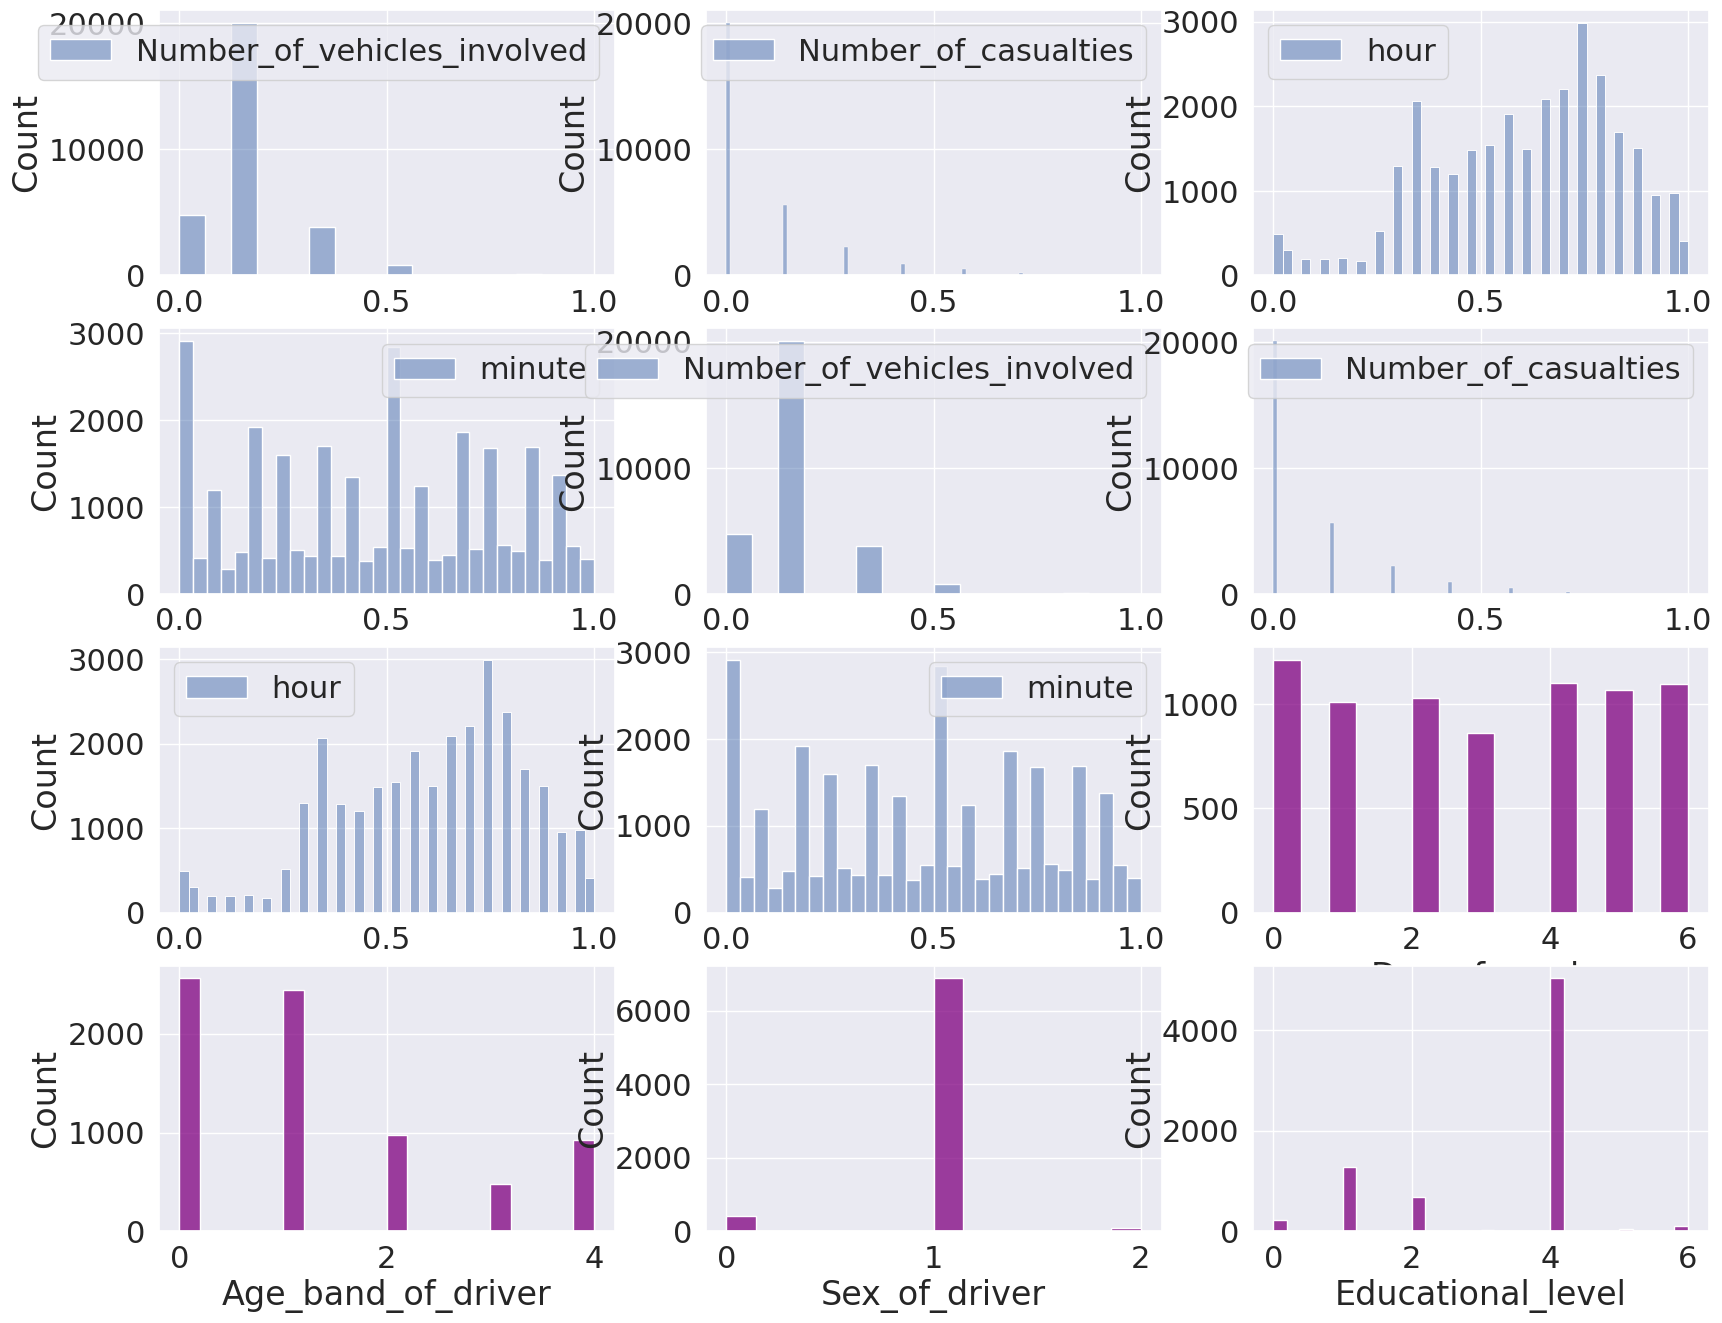

In [ ]:

columnList = list(X_train.columns)
columnList

fig = plt.figure(figsize=[20,20])
for col,i in zip(columnList,range(1,13)):
    axes = fig.add_subplot(5,3,i)
    sns.histplot(X_train[col],ax=axes, kde_kws={'bw':1.5}, color='purple')
plt.show();

In [ ]:
def make_classification_report(model, inputs, targets, model_name=None, record=False):
    """
     To Generate the classification report with all the metrics of a given model with confusion matrix as well as ROC AUC curve.

    """
    if model_name is None:
        model_name = str(type(model)).split(".")[-1][0:-2]

    preds = model.predict(inputs)

    # Check if the model is binary or multiclass
    if len(np.unique(targets)) > 2:  # Multiclass
        prob_preds = model.predict_proba(inputs)
    else:  # Binary
        prob_preds = model.predict_proba(inputs)[:, 1]

    # Calculate ROC AUC score
    auc_score = roc_auc_score(targets, prob_preds, multi_class='ovo' if len(np.unique(targets)) > 2 else 'ovr')
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))

In [ ]:
# import the model
from sklearn.linear_model import LogisticRegression

#fit the model
model =LogisticRegression()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_test)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Slight Injury' , 'Serious Injury','Fatal injury']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Slight Injury' , 'Serious Injury','Fatal injury']))
print("Accuracy score for training dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

		LOGISTICREGRESSION MODEL

Training part:
                precision    recall  f1-score   support

 Slight Injury       0.85      1.00      0.92      6282
Serious Injury       1.00      0.00      0.00      1012
  Fatal injury       0.00      0.00      0.00        95

      accuracy                           0.85      7389
     macro avg       0.62      0.33      0.31      7389
  weighted avg       0.86      0.85      0.78      7389

validation part:


ValueError: Found input variables with inconsistent numbers of samples: [2463, 2464]

In [ ]:
# import the model
from sklearn.naive_bayes import GaussianNB

#fit the model
model =GaussianNB()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Slight Injury' , 'Serious Injury','Fatal injury']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Slight Injury' , 'Serious Injury','Fatal injury']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

		GAUSSIANNB MODEL

Training part:
                precision    recall  f1-score   support

 Slight Injury       0.87      0.11      0.20      6282
Serious Injury       0.22      0.03      0.06      1012
  Fatal injury       0.01      0.99      0.03        95

      accuracy                           0.11      7389
     macro avg       0.37      0.38      0.10      7389
  weighted avg       0.77      0.11      0.18      7389

validation part:
                precision    recall  f1-score   support

 Slight Injury       0.85      0.12      0.22      2069
Serious Injury       0.20      0.03      0.06       368
  Fatal injury       0.01      0.96      0.02        26

      accuracy                           0.12      2463
     macro avg       0.35      0.37      0.10      2463
  weighted avg       0.74      0.12      0.19      2463

Accuracy score for traing dataset 0.11490052781161185
Accuracy score for validation dataset 0.11977263499796996
ROC AUC Score : 59.95%

